In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import KFold, cross_val_score,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib
# from sklearn.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier



from utils import read_classification_dataset, features_histograms_mean_std

c:\Users\Jayden\Documents\school\machine learning\Project


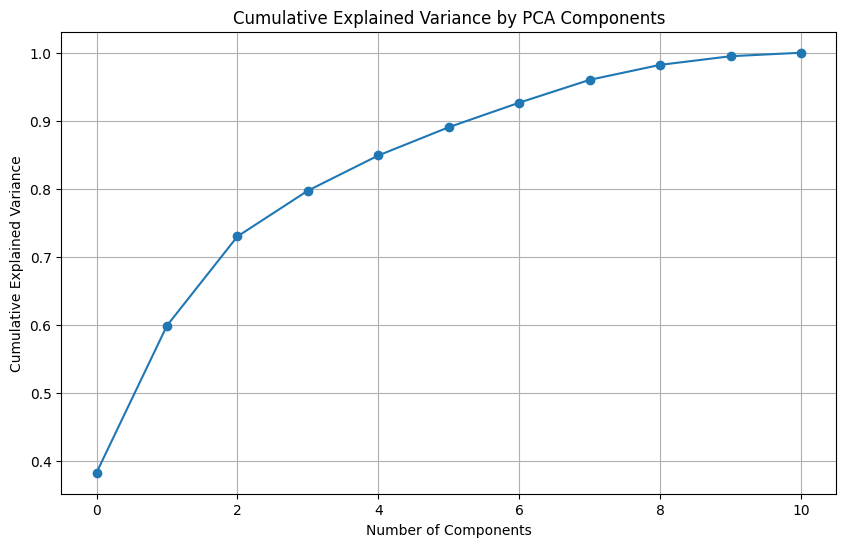

In [2]:
train,target,test = read_classification_dataset(5)



#Finding good n_components for PCA
imputer = KNNImputer(n_neighbors=5,weights='distance')
# imputer = SimpleImputer()
train_imputed = imputer.fit_transform(train)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(train_imputed)

pca = PCA()
pca.fit(scaled_data)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# cumulative_variance = np.cumsum(pca.explained_variance_ratio_)





In [3]:

pipe = Pipeline([
    ("Scaler",StandardScaler()),
    ("Imputer", KNNImputer(weights="distance")),
    ("FR", PCA(n_components=6)),
    ("Classifier", RandomForestClassifier(n_jobs=-1,max_features='log2',bootstrap=True))
])


params = {
"Imputer":[SimpleImputer(),KNNImputer(weights="distance")],
# "Classifier__n_estimators":[50,100],
"Classifier__class_weight":["balanced","balanced_subsample"]

}

grid = GridSearchCV(pipe,params,scoring="f1_weighted")

grid.fit(train.values,target.values.ravel())

best_model_path = './models/c_5_Scale_KNNI(1)_RF(balancedsubsample_log2).pkl'
joblib.dump(grid.best_estimator_, best_model_path)

print(grid.best_estimator_)
print(grid.best_score_)



Pipeline(steps=[('Scaler', StandardScaler()), ('Imputer', SimpleImputer()),
                ('FR', PCA(n_components=6)),
                ('Classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        max_features='log2', n_jobs=-1))])
0.5244199138404547


In [6]:

pipe = Pipeline([
    ("Scaler",MinMaxScaler()),
    ("Imputer", KNNImputer(n_neighbors=3,weights="distance")),
    ("FR", PCA(n_components=8)),
    ("Classifier", KNeighborsClassifier(weights='distance'))
])


params = {
"Scaler":[MinMaxScaler(),StandardScaler()],
"Imputer":[SimpleImputer(),KNNImputer(weights="distance")],
"Classifier__n_neighbors":[3,5,7,9,11],
"FR__n_components":[4,5,6,7,8,9,10]

}

grid = GridSearchCV(pipe,params,scoring="f1_weighted")

grid.fit(train.values,target.values.ravel())

best_model_path = './models/c_5_MinMax_KNNI(1)_PCA(8)_KNN(3).pkl'
joblib.dump(grid.best_estimator_, best_model_path)

print(grid.best_estimator_)
print(grid.best_score_)



Pipeline(steps=[('Scaler', StandardScaler()), ('Imputer', SimpleImputer()),
                ('FR', PCA(n_components=10)),
                ('Classifier',
                 KNeighborsClassifier(n_neighbors=11, weights='distance'))])
0.5299315419776637


In [5]:
pipe = Pipeline([
    ("Scaler",StandardScaler()),
    ("Imputer", KNNImputer(weights="distance")),
    # ("FR", PCA(n_components=10)),
    ("Classifier", SVC())
])


params = {
"Scaler":[MinMaxScaler(),StandardScaler()],
"Imputer":[SimpleImputer(),KNNImputer(weights="distance")],
'Classifier__kernel':['linear','sigmoid','rbf']


}

grid = GridSearchCV(pipe,params,scoring="f1_weighted")

grid.fit(train.values,target.values.ravel())

best_model_path = './models/c_5_MinMax_KNNI(1)_SVC(rbf).pkl'
joblib.dump(grid.best_estimator_, best_model_path)

print(grid.best_estimator_)
print(grid.best_score_)



Pipeline(steps=[('Scaler', StandardScaler()), ('Imputer', SimpleImputer()),
                ('Classifier', SVC())])
0.5555660837346925
